# Chapter 6: Logistics Regression and Classification

## Performing a Logistic Regression
### Logistic Function
##### Example 6-1. The logistic function in Python for one independant variable

In [1]:
import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

##### Example 6-2. Using SymPy to plot a logistic function

1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


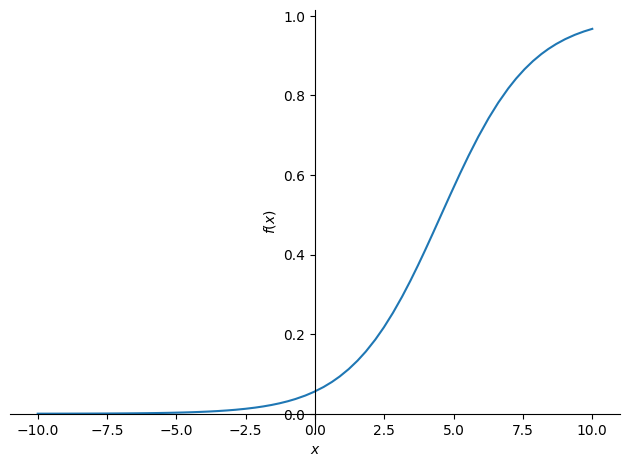

In [2]:
from sympy import *

b0, b1, x = symbols('b0 b1 x')
p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)
print(p)

plot(p)

### Fitting the Logistic Curve
##### Example 6-3. Using a plain logistic regression SciPy

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',')

# Extract input variables
X = df.values[:, :-1]
Y = df.values[:, -1]

# Perform logistic regression
model = LogisticRegression(penalty='none')
model.fit(X, Y)

print(model.coef_.flatten())
print(model.intercept_.flatten())

[0.69267212]
[-3.17576395]


##### Example 6-4. Calculating the joint likelihood of observing all points for a given logistic regression

In [6]:
patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

# Calculate the joint likelihood
joint_likelihood = 1.0

for p in patient_data:
    if p.y == 1.0:
        joint_likelihood *= logistic_function(p.x)
    elif p.y == 0.0:
        joint_likelihood *= (1 -logistic_function(p.x))

print(joint_likelihood)

4.7911180221699105e-05


##### Example 6-5. Compressing the joint likelihood calculation without an if expression 

In [7]:
for p in patient_data:
    joint_likelihood *= logistic_function(p.x) ** p.y * (1.0 - logistic_function(p.x)) ** (1.0 - p.y)

##### Example 6-7. Expressing a joint likelihood for logistic regression in SymPy

In [ ]:
joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b + m * x(i)))))**y(i) * (1.0 -(1.0 / (1.0 + exp(-(b + m * x(i))))))**(1-y(i))), (i, 0, n))

##### Example 6-8. Using gradient descent on logistic regression

In [11]:
points = list(pd.read_csv('https://tinyurl.com/y2cocoo7', delimiter=',').itertuples())

b0, b1, i, n = symbols('b0 b1 i n')
x, y = symbols('x y', cls=Function)

joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))**y(i) * (1.0 -(1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) \
                           **(1-y(i))), (i, 0, n))

# Partial derivative for m
d_b1 = diff(joint_likelihood, b1).subs(n, len(points)-1).doit().replace(x, lambda i: points[i].x).replace(y, lambda i: points[i].y)

# Partial derivative for b
d_b0 = diff(joint_likelihood, b0).subs(n, len(points)-1).doit().replace(x, lambda i: points[i].x).replace(y, lambda i: points[i].y)

# Compile using lambdify for faster computation
d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

# Perform Gradient Descent
b1 = 0.01
b0 = 0.01
L = 0.01

for j in range(10_000):
    b1 += d_b1(b1, b0) * L
    b0 += d_b0(b1, b0) * L

print(b1, b0)

0.6926693075370819 -3.1757515504098244
